# Automating CryptoMarketCap.com API Pull

In [2]:
# This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-05-04T00:48:03.166Z', 'error_code': 0, 'error_message': None, 'elapsed': 288, 'credit_count': 1, 'notice': None, 'total_count': 9455}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10199, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
import pandas as pd

# This allows you to see all the columns

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [4]:
# This normalizes the data and makes it all pretty in a dataframe

df  = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\saada\AppData\Local\Temp\ipykernel_11660\1412400820.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10199,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.936350e+07,1.936350e+07,False,NaN,1,NaN,NaN,None,2023-05-04T00:46:00.000Z,29045.358666,1.916990e+10,16.8331,0.175840,1.609485,-0.402343,4.762843,30.017210,23.375314,5.624198e+11,47.1014,6.099525e+11,None,2023-05-04T00:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-04 00:47:58.345666
1,1027,Ethereum,ETH,ethereum,6820,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203818e+08,1.203818e+08,False,NaN,2,NaN,NaN,None,2023-05-04T00:46:00.000Z,1901.056801,8.371482e+09,11.9896,-0.037877,1.957780,-0.880515,5.275112,21.377938,15.635252,2.288527e+11,19.1611,2.288527e+11,None,2023-05-04T00:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-04 00:47:58.345666
2,825,Tether,USDT,tether,52462,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.198583e+10,8.509064e+10,False,NaN,3,NaN,NaN,None,2023-05-04T00:46:00.000Z,1.000439,2.993267e+10,20.0804,0.003367,-0.000574,0.020090,0.042325,0.034312,0.024036,8.202180e+10,6.8674,8.512797e+10,None,2023-05-04T00:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-04 00:47:58.345666
3,1839,BNB,BNB,bnb,1321,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558621e+08,1.558621e+08,False,NaN,4,NaN,NaN,None,2023-05-04T00:46:00.000Z,325.505862,8.038980e+08,15.2001,-0.071790,0.520961,-2.593913,5.342173,12.651483,-0.403336,5.073403e+10,4.2478,5.073403e+10,None,2023-05-04T00:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-04 00:47:58.345666
4,3408,USD Coin,USDC,usd-coin,12149,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.017702e+10,3.017702e+10,False,NaN,5,NaN,NaN,None,2023-05-04T00:46:00.000Z,1.000170,3.670312e+09,26.3008,-0.004524,0.010776,0.010814,0.051902,0.020577,0.031748,3.018214e+10,2.5271,3.018214e+10,None,2023-05-04T00:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-04 00:47:58.345666
5,52,XRP,XRP,xrp,940,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.176828e+10,9.998898e+10,False,NaN,6,NaN,NaN,None,2023-05-04T00:46:00.000Z,0.461808,1.078304e+09,19.5512,-0.281526,-0.447748,-1.145111,-6.417772,23.522747,12.479023,2.390700e+10,2.0017,4.618079e+10,None,2023-05-04T00:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-04 00:47:58.345666
6,2010,Cardano,ADA,cardano,778,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.481554e+10,3.574457e+10,False,NaN,7,NaN,NaN,None,2023-05-04T00:46:00.000Z,0.392036,2.595545e+08,30.7442,-0.363568,0.790581,-4.205166,1.473000,16.904826,-2.046716,1.364894e+10,1.1428,1.764162e+10,None,2023-05-04T00:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-04 00:47:58.345666
7,74,Dogecoin,DOGE,dogecoin,701,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.391989e+11,1.391989e+11,False,NaN,8,NaN,NaN,None,2023-05-04T00:46:00.000Z,0.079590,3.115180e+08,32.6353,-0.096667,1.383341,-0.416950,-14.345878,6.788928,-12.561859,1.107879e+10,0.9282,1.107879e+10,None,2023-05-04T00:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-04 00:47:58.345666
8,3890,Polygon,MATIC,polygon,684,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+

In [5]:
# Taking code above and defining a function

def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '294e415a-4304-475e-b056-748e78971dd3',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

  # append new data to dataframe

    df  = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df


    if not os.path.isfile(r'C:\Users\saada\Documents\Python Scripts\API.csv'):
       df.to_csv(r'C:\Users\saada\Documents\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\saada\Documents\Python Scripts\API.csv', mode='a', header=False)



In [6]:
# Running API for set time

import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60) #sleep for 1 minute
exit()


{'status': {'timestamp': '2023-05-04T00:42:35.217Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 9455}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10199, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\saada\AppData\Local\Temp\ipykernel_6536\3055151412.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-05-04T00:43:35.356Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9455}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10199, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\saada\AppData\Local\Temp\ipykernel_6536\3055151412.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-05-04T00:44:35.534Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 9455}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10199, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\saada\AppData\Local\Temp\ipykernel_6536\3055151412.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-05-04T00:45:35.803Z', 'error_code': 0, 'error_message': None, 'elapsed': 57, 'credit_count': 1, 'notice': None, 'total_count': 9455}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10199, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\saada\AppData\Local\Temp\ipykernel_6536\3055151412.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-05-04T00:46:35.943Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9455}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10199, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\saada\AppData\Local\Temp\ipykernel_6536\3055151412.py:30: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


KeyboardInterrupt: 

In [ ]:
# Reading results from the csv file

df72 = pd.read_csv(r'C:\Users\saada\Documents\Python Scripts\API.csv')
df72

In [7]:
# Change notation

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
# View change

df

In [9]:
# Coin trends over time

df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.17584,1.60949,-0.40234,4.76284,30.01721,23.37531
Ethereum,-0.03788,1.95778,-0.88052,5.27511,21.37794,15.63525
Tether,0.00337,-0.00057,0.02009,0.04232,0.03431,0.02404
BNB,-0.07179,0.52096,-2.59391,5.34217,12.65148,-0.40334
USD Coin,-0.00452,0.01078,0.01081,0.05190,0.02058,0.03175
XRP,-0.28153,-0.44775,-1.14511,-6.41777,23.52275,12.47902
Cardano,-0.36357,0.79058,-4.20517,1.47300,16.90483,-2.04672
Dogecoin,-0.09667,1.38334,-0.41695,-14.34588,6.78893,-12.56186
Polygon,-0.17088,3.36425,-0.40291,-8.36017,-10.49288,-15.45425


In [13]:
# Change view format to stack

df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.17584
             quote.USD.percent_change_24h     1.60949
             quote.USD.percent_change_7d     -0.40234
             quote.USD.percent_change_30d     4.76284
             quote.USD.percent_change_60d    30.01721
             quote.USD.percent_change_90d    23.37531
Ethereum     quote.USD.percent_change_1h     -0.03788
             quote.USD.percent_change_24h     1.95778
             quote.USD.percent_change_7d     -0.88052
             quote.USD.percent_change_30d     5.27511
             quote.USD.percent_change_60d    21.37794
             quote.USD.percent_change_90d    15.63525
Tether       quote.USD.percent_change_1h      0.00337
             quote.USD.percent_change_24h    -0.00057
             quote.USD.percent_change_7d      0.02009
             quote.USD.percent_change_30d     0.04232
             quote.USD.percent_change_60d     0.03431
             quote.USD.percent_change_90

In [11]:
#Check data type

type(df4)

pandas.core.series.Series

In [12]:
# Adding column name 

df5 = df4.to_frame(name ='values')
df5 

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.17584
            quote.USD.percent_change_24h   1.60949
            quote.USD.percent_change_7d   -0.40234
            quote.USD.percent_change_30d   4.76284
            quote.USD.percent_change_60d  30.01721
            quote.USD.percent_change_90d  23.37531
Ethereum    quote.USD.percent_change_1h   -0.03788
            quote.USD.percent_change_24h   1.95778
            quote.USD.percent_change_7d   -0.88052
            quote.USD.percent_change_30d   5.27511
            quote.USD.percent_change_60d  21.37794
            quote.USD.percent_change_90d  15.63525
Tether      quote.USD.percent_change_1h    0.00337
            quote.USD.percent_change_24h  -0.00057
            quote.USD.percent_change_7d    0.02009
            quote.USD.percent_change_30d   0.04232
            quote.USD.percent_change_60d   0.03431
            quote.USD.percent_change_90d   0.02404
BNB         quote.USD.percent_change_1h   -0.07179
            quote.USD.percent_change_24h   0.52096
            quote.USD.percent_change_7d   -2.59391
            quote.USD.percent_change_30d   5.34217
            quote.USD.percent_change_60d  12.65148
            quote.USD.percent_change_90d  -0.40334
USD Coin    quote.USD.percent_change_1h   -0.00452
            quote.USD.percent_change_24h   0.01078
            quote.USD.percent_change_7d    0.01081
            quote.USD.percent_change_30d   0.05190
            quote.USD.percent_change_60d   0.02058
            quote.USD.percent_change_90d   0.03175
XRP         quote.USD.percent_change_1h   -0.28153
            quote.USD.percent_change_24h  -0.44775
            quote.USD.percent_change_7d   -1.14511
            quote.USD.percent_change_30d  -6.41777
            quote.USD.percent_change_60d  23.52275
            quote.USD.percent_change_90d  12.47902
Cardano     quote.USD.percent_change_1h   -0.36357
            quote.USD.percent_change_24h   0.79058
            quote.USD.percent_change_7d   -4.20517
            quote.USD.percent_change_30d   1.47300
            quote.USD.percent_change_60d  16.90483
            quote.USD.percent_change_90d  -2.04672
Dogecoin    quote.USD.percent_change_1h   -0.09667
            quote.USD.percent_change_24h   1.38334
            quote.USD.percent_change_7d   -0.41695
            quote.USD.percent_change_30d -14.34588
            quote.USD.percent_change_60d   6.78893
            quote.USD.percent_change_90d -12.56186
Polygon     quote.USD.percent_change_1h   -0.17088
            quote.USD.percent_change_24h   3.36425
            quote.USD.percent_change_7d   -0.40291
            quote.USD.percent_change_30d  -8.36017
            quote.USD.percent_change_60d -10.49288
            quote.USD.percent_change_90d -15.45425
Solana      quote.USD.percent_change_1h    0.74429
            quote.USD.percent_change_24h   1.37589
            quote.USD.percent_change_7d    2.32050
            quote.USD.percent_change_30d   9.51866
            quote.USD.percent_change_60d   4.59317
            quote.USD.percent_change_90d  -7.80476
Polkadot    quote.USD.percent_change_1h   -0.44880
            quote.USD.percent_change_24h   1.04365
            quote.USD.percent_change_7d   -3.57386
            quote.USD.percent_change_30d -10.10189
            quote.USD.percent_change_60d  -2.91666
            quote.USD.percent_change_90d -12.31677
Litecoin    quote.USD.percent_change_1h   -0.16515
            quote.USD.percent_change_24h   0.81829
            quote.USD.percent_change_7d   -1.19920
            quote.USD.percent_change_30d  -4.32266
            quote.USD.percent_change_60d  -0.88755
            quote.USD.percent_change_90d -10.94576
TRON        quote.USD.percent_change_1h    0.37726
            quote.USD.percent_change_24h   0.30156
            quote.USD.percent_change_7d    5.52477
            quote.USD.percent_change_30d   5.25433
            quote.USD.percent_change_60d   3.93172
            quo

In [14]:
# Counting values for range

df5.count()

values    90
dtype: int64

In [15]:
# Setting an index
# Creating a range and passing as dataframe

index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.17584
1,Bitcoin,quote.USD.percent_change_24h,1.60949
2,Bitcoin,quote.USD.percent_change_7d,-0.40234
3,Bitcoin,quote.USD.percent_change_30d,4.76284
4,Bitcoin,quote.USD.percent_change_60d,30.01721
5,Bitcoin,quote.USD.percent_change_90d,23.37531
6,Ethereum,quote.USD.percent_change_1h,-0.03788
7,Ethereum,quote.USD.percent_change_24h,1.95778
8,Ethereum,quote.USD.percent_change_7d,-0.88052
9,Ethereum,quote.USD.percent_change_30d,5.27511


In [16]:
# Changing column name 

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.17584
1,Bitcoin,quote.USD.percent_change_24h,1.60949
2,Bitcoin,quote.USD.percent_change_7d,-0.40234
3,Bitcoin,quote.USD.percent_change_30d,4.76284
4,Bitcoin,quote.USD.percent_change_60d,30.01721
5,Bitcoin,quote.USD.percent_change_90d,23.37531
6,Ethereum,quote.USD.percent_change_1h,-0.03788
7,Ethereum,quote.USD.percent_change_24h,1.95778
8,Ethereum,quote.USD.percent_change_7d,-0.88052
9,Ethereum,quote.USD.percent_change_30d,5.27511


In [20]:
# Changing the name of the values under percent change column for easier read

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.17584
1,Bitcoin,24h,1.60949
2,Bitcoin,7d,-0.40234
3,Bitcoin,30d,4.76284
4,Bitcoin,60d,30.01721
5,Bitcoin,90d,23.37531
6,Ethereum,1h,-0.03788
7,Ethereum,24h,1.95778
8,Ethereum,7d,-0.88052
9,Ethereum,30d,5.27511


In [21]:
# importing libraries for visuals

import seaborn as sns 
import matplotlib.pyplot as plt

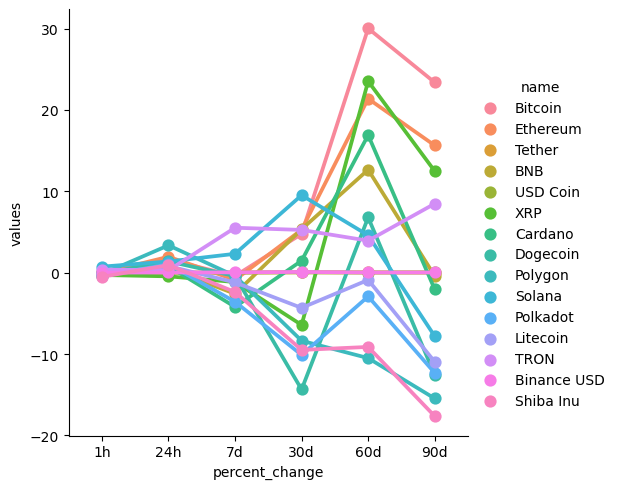

In [22]:
# plotting results 

sns.catplot(x ='percent_change', y ='values', hue = 'name', data = df7, kind = 'point')

In [24]:
# Creating dataframe with columns of my choosing

df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,29045.35867,2023-05-04 00:47:58.345666


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

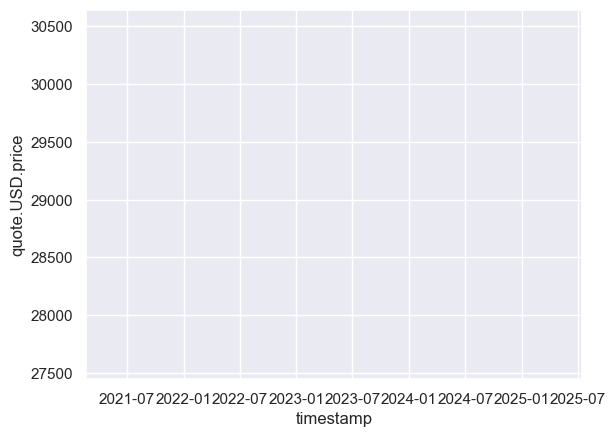

In [25]:
# setting theme and lineplot for new dataframe above

sns.set_theme(style = "darkgrid")

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)